As a part of implementing principal component analysis (PCA) to analyze the given face images, we will load the face data faces.dat into the memory. As well as, we will display the 200th image.

In [22]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

In [23]:
# Loading the face data

faceData = np.loadtxt("faces.dat")

Text(0.5, 1.0, '200th Image')

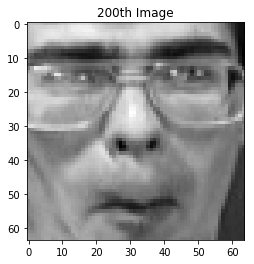

In [24]:
# Displaying 200th image

img200 = np.transpose(faceData[199].reshape(64,64))
img_200 = Image.fromarray(img200)

plt.imshow(img_200, cmap='gray')
plt.title('200th Image')

As a part of implementing PCA, we need to identify the mean and substract the value from the data and will get he mean-centered data matrix. And also, we will display the 100th image.

Text(0.5, 1.0, '100th Image')

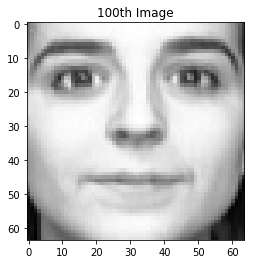

In [25]:
# calculating mean
xMean = np.mean(faceData)

#substracting mean value
meanX = faceData - xMean

#displaying 100th image
img100 = np.transpose(meanX[99].reshape(64,64))
img_100 = Image.fromarray(img100)

plt.imshow(img_100, cmap='gray')
plt.title('100th Image')

To complete the process of performing PCA, we will calculate covariance matrix on the mean-centered data matrix the we calculated in (b) ans. And after that, we will calculate eigen values and eigen vectors from the covariance matrix. Furthermore, we will sort the eigen values and eigen vectors in decending order and plot the sorted eigen values.

In [26]:
# calculating covarience matrix
cov_mat = np.cov(meanX , rowvar = False)

# calculataing eigen values and eigen vectors
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

# sorting eigen values and eigen vectors
sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalue = eigen_values[sorted_index]

sorted_eigenvectors = eigen_vectors[:,sorted_index]


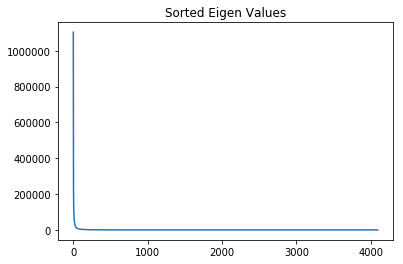

In [27]:
# ploting the sorted eigen values

plt.plot(sorted_eigenvalue)
plt.title('Sorted Eigen Values')
plt.show()

In [28]:
# calculating the rank of covariance matrix

rank = np.linalg.matrix_rank(cov_mat)
print("Rank of the Covariance Matrix is : ",rank)

Rank of the Covariance Matrix is :  399


As we know that rank of the matrix is an upper bound to the number of non zero eigenvalues we can obtain. In our case, after 399 (i.e., 400th) we get zero eigen values. In PCA, new variables that are constructed a way that these new variables are uncorrelated and most of the information within the initial variables is stored into the first components. So that, if you want to reduce your dataset’s dimensionality, you can focus your analysis on the first few components without suffering a great penalty in terms of information loss. Calculating the mean-centered data matrix, we centered the data and lost 1 degree of freedom and when we sort our eigenvectors in descending order with respect to their eigenvalues, we will have that the first eigenvector accounts for the largest spread among data, the second one for the second largest spread and so on. Therefore, the last eigen values are obtained from no correlation among features and so the last eigen value is zero.

In order to determine how many principal components you want to keep, we need to have a view at the cumulative variance of these components.

In [29]:
#performing PCA with sklearn with 400 components

pca = PCA(400)
pca.fit(faceData)

PCA(n_components=400)

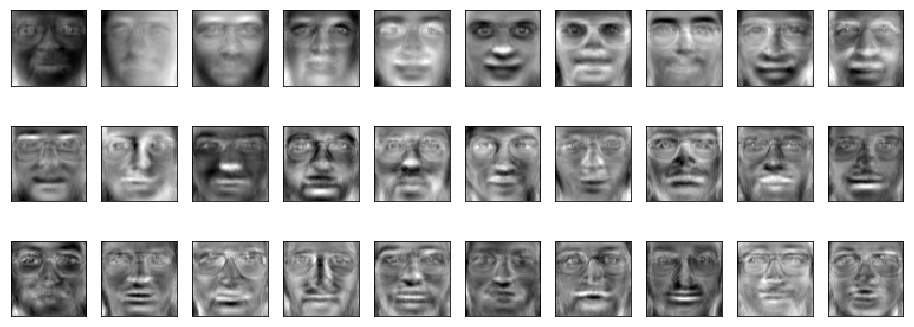

In [30]:
#displaying eigan faces for 400 components

fig = plt.figure(figsize=(16, 6))

for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.transpose(pca.components_[i].reshape(64, 64)),
              cmap=plt.cm.binary_r)


This gives us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses and lips.

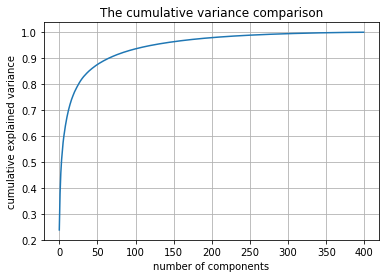

In [31]:
#the cumulative variance 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('The cumulative variance comparison')
plt.grid()

We see that these 150 components account for just over 95% of the variance. Therefore, we will be using these 150 components which will help us to recover most of the essential characteristics of the data and will give us a good enough image with reduced dimensionality. Below, we have compared the input images with the images reconstructed from these 150 components:

In [32]:
#performing PCA for 150 components

pca = PCA(150).fit(faceData)
components = pca.transform(faceData)
projected = pca.inverse_transform(components)

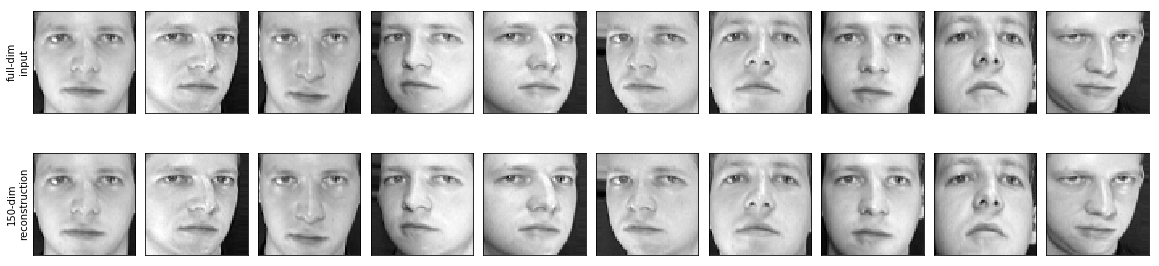

In [55]:
#displaying eigan faces for 150 components

fig, ax = plt.subplots(2, 10, figsize=(20, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(np.transpose(faceData[i].reshape(64, 64)), cmap='binary_r')
    ax[1, i].imshow(np.transpose(projected[i].reshape(64, 64)), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

We will be dispalying the top-5 leading eigenvectors below corresponding to the top-5 largest eigenvalues.

In [41]:
#creating top 5 eigen vectors

eigan01 = Image.fromarray(np.transpose(sorted_eigenvectors[:,0].reshape(64,64)))
eigan02 = Image.fromarray(np.transpose(sorted_eigenvectors[:,1].reshape(64,64)))
eigan03 = Image.fromarray(np.transpose(sorted_eigenvectors[:,2].reshape(64,64)))
eigan04 = Image.fromarray(np.transpose(sorted_eigenvectors[:,3].reshape(64,64)))
eigan05= Image.fromarray(np.transpose(sorted_eigenvectors[:,4].reshape(64,64)))


Text(0.5, 1.0, 'Eigen vector  1')

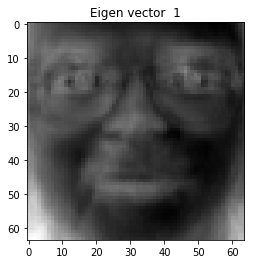

In [42]:
#first eigen vector

plt.imshow(eigan01, cmap='gray')
plt.title("Eigen vector  1")

Text(0.5, 1.0, 'Eigen vector 2')

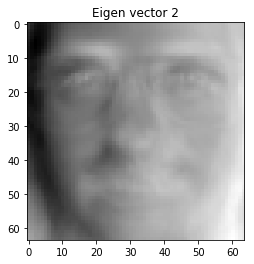

In [43]:
#2nd eigen vector

plt.imshow(eigan02, cmap='gray')
plt.title("Eigen vector 2")

Text(0.5, 1.0, 'Eigen vector 3')

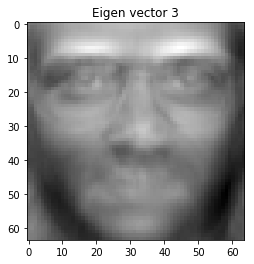

In [44]:
#3rd eigen vector

plt.imshow(eigan03,cmap='gray')
plt.title("Eigen vector 3")

Text(0.5, 1.0, 'Eigen vector 4')

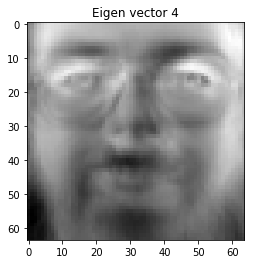

In [45]:
#4th eigen vector

plt.imshow(eigan04,cmap='gray')
plt.title("Eigen vector 4")

Text(0.5, 1.0, 'Eigen vector 5')

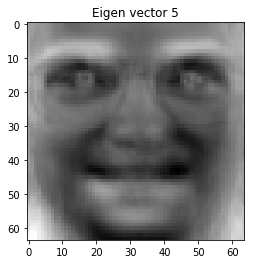

In [46]:
#5th eigen vector

plt.imshow(eigan05,cmap='gray')
plt.title("Eigen vector 5")

We will display, respectively, the reconstructed 100th images using 10, 100, 200, and 399 principal components.

Text(0.5, 1.0, '399 Principal Components')

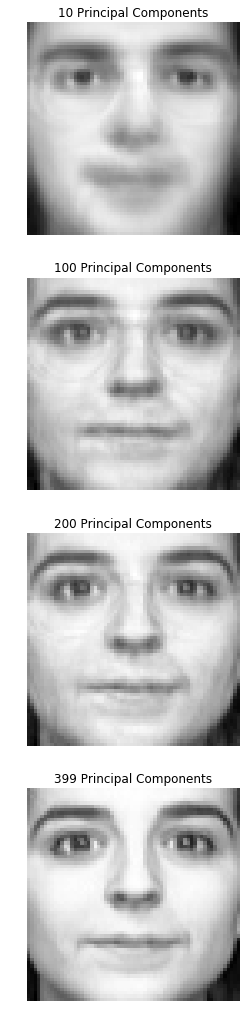

In [56]:
#dispaying the reconstructed 100th images 

fig = plt.figure(figsize = (30, 18))


#Constructing PCA for 10 principal components

pca = PCA(10).fit(faceData)
components = pca.transform(faceData)
projected = pca.inverse_transform(components)

#plotting the image for 10 principal components
fig.add_subplot(4,1,1)
plt.imshow(np.transpose(projected[99].reshape(64, 64)), cmap='binary_r')
plt.axis('off')
plt.title("10 Principal Components")


#Constructing PCA for 100 principal components

pca = PCA(100).fit(faceData)
components = pca.transform(faceData)
projected = pca.inverse_transform(components)

#plotting the image for 100 principal components
fig.add_subplot(4,1,2)
plt.imshow(np.transpose(projected[99].reshape(64, 64)), cmap='binary_r')
plt.axis('off')
plt.title("100 Principal Components")


#Constructing PCA for 200 principal components

pca = PCA(200).fit(faceData)
components = pca.transform(faceData)
projected = pca.inverse_transform(components)

#plotting the image for 200 principal components
fig.add_subplot(4,1,3)
plt.imshow(np.transpose(projected[99].reshape(64, 64)), cmap='binary_r')
plt.axis('off')
plt.title("200 Principal Components")


#Constructing PCA for 399 principal components

pca = PCA(399).fit(faceData)
components = pca.transform(faceData)
projected = pca.inverse_transform(components)

#plotting the image for 399 principal components
fig.add_subplot(4,1,4)
plt.imshow(np.transpose(projected[99].reshape(64, 64)), cmap='binary_r')
plt.axis('off')
plt.title("399 Principal Components")